In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/ex1.csv')
dataset.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(np.array(dataset)[:,:7], np.array(dataset)[:,7], random_state=50, test_size = 0.25)

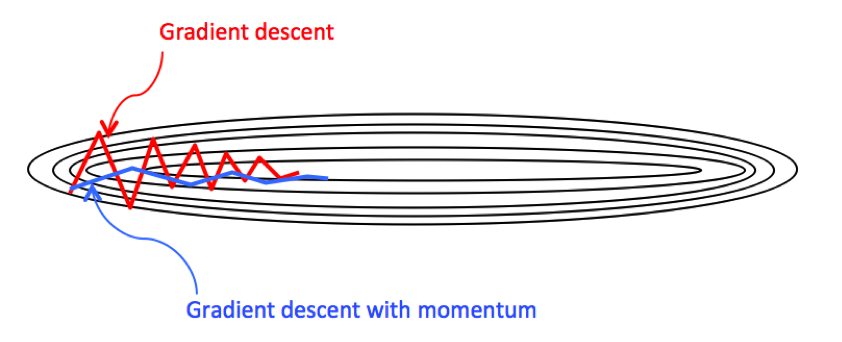

In [ ]:
y_train[0]

2.0

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train-1, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test-1, num_classes=3)

In [ ]:
y_train[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12,  input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

#adam = keras.optimizers.Adam(learning_rate=0.01)

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=10, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 1.8319 - accuracy: 0.2685
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0969 - accuracy: 0.3691
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0971 - accuracy: 0.3557
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0969 - accuracy: 0.3557
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.3557
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.3557
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0968 - accuracy: 0.3557
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.3557
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.3557
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 1.1059 - accuracy: 0.3000
Accuracy: 30.00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

# define the keras model
model = Sequential()
model.add(Dense(12, kernel_initializer=initializer, input_dim=7, activation='relu'))
model.add(Dense(8,kernel_initializer=initializer, activation='relu'))
model.add(Dense(3,kernel_initializer=initializer, activation='softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

#adam = keras.optimizers.Adam(learning_rate=0.01)

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=10, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 2ms/step - loss: 1.0992 - accuracy: 0.3423
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3423
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.2215
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3289
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3020
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 1.0960 - accuracy: 0.2148
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3557
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.3557
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.3557
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 1.1026 - accuracy: 0.3000
Accuracy: 30.00


In [ ]:
#print(x_test[0], y_test[0])
np.array(x_test[0]).reshape(7,1)

array([[12.3   ],
       [13.34  ],
       [ 0.8684],
       [ 5.243 ],
       [ 2.974 ],
       [ 5.637 ],
       [ 5.063 ]])

In [ ]:
# make probability predictions with the model
predictions = model.predict(x_test)


In [ ]:
y_test[0],predictions[0]

(array([0., 0., 1.], dtype=float32),
 array([0.33962408, 0.34511134, 0.3152646 ], dtype=float32))

In [ ]:
# round predictions 
rounded = [round(x[0]) for x in predictions]

...
# make class predictions with the model
predictions = (model.predict(x_test) > 0.5).astype(int)